In [2]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [3]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [4]:
from networks import lenet_mnist

branchyNet = lenet_mnist.get_network()
if cuda.available:
    branchyNet.to_gpu()
branchyNet.training()

Import Data

In [9]:
from datasets import mnist
training_size=100
x_train, y_train, x_test, y_test = mnist.get_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train, y_train, x_test, y_test = x_train[:training_size*6], y_train[:training_size*6], x_test[:training_size], y_test[:training_size]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#training size = 6000, each epoch we need to 12 seconds.
#this app need 28 cores and at least 3GB memory for UTSA server when training size is 6000.

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))
((600, 1, 28, 28), (600,), (100, 1, 28, 28), (100,))


/home/peng/cooperating/venv/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/peng/cooperating/venv/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Settings

In [10]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 50

Train Main Network

In [11]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

1620767475.3
[274 287 346 345  80 447 584 355 221 541 560 393 268 147 449 145 552 231
 243 240  27 315 470 369 454  63 340 406 128 101 262 237 245 452 448 284
  76  43 436 398  16 569 386 126 233  42 182 521 456 134 127 359  70 159
 573 543 177 542 485 280   3 455 117  86  60 520 366 277 472 318 475 308
 508 500  45 342 361 378  31 133 368 176 261 154 330 397  44 463  72 524
 320 333 198 477 331  90 592 249 300 273 597 131 437  92 443 458 267 512
 362 325 498 532  30 254 373 567  77  23 174 216 302 278 188  71  53 503
 192 596 367 208 187 285  64 135 430   5  32 281  56 156 561 462 537 427
 408 116 415 269  47 388 577 257 364 169 478  58 309 296 381 142  21  99
 476 348  81 175  62 540 494 445   2 106 124 506 580 306 566 248  39 460
 578 347 490 144   6 396 484 166 574 312 185 568 435 140 213 111 507 202
  55 350 551 402 212  34 571 205 247 554 591 183 444 260 170 104 511 380
 480 544 365 179  74 416 311 264 132 218 404 123 352   7  38 276 236  41
 229  88 353 383 255 141 400 199 303 5

1620767480.22
[514 371 507  70 342 170 253 277 205 300 417  96 387 359 436 100  44 565
 347 503  85   8 217  61 421 367 133  27 552 425 460 265 185 484 563 407
 249 428 393 535 419 453 282 512 114 415 149 520 397 441 526 353 500  81
 129  74 404 575 245 166  33  38 248 207 554 521 256 191 365 289 213 555
 284 346 479  34  46 399 438 360 304 348 135 285 176 504 141 410 454 193
 247 418 529 450 559 140 183 568 424 156 335 159 497  15 546 549  93 398
 437 492   2 357 509 155  24  19 596 328 160 352 175 488 455 420 290 461
 330 122 118 355  77 233  66 532 587 204 235 138 384 543 264  57 466 409
 308 318 465  78 215 517 174  53 184 238  94  72 400 143  22 350 226 564
 260 305 232 261 251 288 356 180  26 271 316 473 449 267 132 338 483 120
  25 516 487 573   4  67 339 599 142 158  29  64 146 327 495 291 411 490
 542  45 210 302 123 112 322 594 486 412 550 246 222 294 190 433 528  52
 426  13 306  88 389 349 375 567 320 491 208 263 443 383  91 236 206 343
 562 225  68 331 376  48 110 211 570 

1620767484.97
[ 23 493 190 370 578  21 189 392 186 199 236 360 223 441 594 424  98 234
  99 483 541 534 471 303 203 595 219 475 156  77 460 506 309 454 293 211
 117 306 437 280 549 477 503 305 530 528 127 416 447 442 373 145 509 322
 542 141 551 184 559 215 452 179 390 267 387 283 282 313 580 137 244 444
   6 555  46 318 334 543 220 516  92 381 299 556 557 226  67 372 376 118
 181 246 419 573 124 112 428 269 535 385 171 596  43   3 469 597 353  37
 103 537 241 404 330 425 126 207 536 161 151 298 386 453 155 109  31 564
 216 380 164 302 277 228 271 440 346  85 183 399 273 462 213  29 202 266
 198 434  42  91 354 402 310 188 422 165 481 252 365 397 393  27 394 561
 333 217 315 345 389 572   8   9  40 599 350 229 388 473 294 423 525  30
  49 484 323 467 340  45 522 465 589  84 464 485 468 583 593 339  79 243
 115 446  14 378 233 274  63 429 512 157 162   4 579 358 108 431 586 401
 104 286 461 592 208 134 254 225 174 463 289   0 222 591 472 312  13 130
 138 458 206 218 455 258 384 210 264 

1620767489.64
[200 277 323 448 520  29 352  63 109  90 368 218 476 567  91 564 522 346
 592 516  44 325 556 350  84 473 344 108 124 165 178 407 353 475  64 471
 193 384 203 132 105 289 419 496  32 239 264 555 206 143  76 127 580 525
 483 157 293 420 228   5 545 486 444 455 487 137 570 372 161 598  42 395
 358 259 429 175 126 579 447 227 538 380 362 379 160   3 265 492 260 297
 470 230 117 573 342 139 234  99  60 357 115 441 558 417 294 401 163  82
 359 433 494 168 261 317  50  47  22 544 493 318 363 235 305 187 382 514
 300 513 485 524 523 566 453  97 397 205  34 110 543  37 331 349 246 292
 138  98 324 478 560 340 381  93  73  61 539 589  79  21  95 410 561 593
 571 135 599 553 528 309 243 247 326 526 136 462 550 164 322 238  25   6
 501 347 134 428 189 436 585 521 530 431 214 508 215  81  20 152 552 577
  23   2 103 413 153 291 422 415 192 122 232 100 147 425 329 527 269 181
 459 327 250  62 231 155 515 244  52 319 572 435 364 173 316 267 213 106
 307 169 101 506  59 586  17 209 559 

1620767494.44
[ 45 107 542  36 374 447  44 215 564 594 190 506  52 494 282 109  27 144
 373 428 262 495 357 528 205 164 401   6 112 226  12 590 561 514 588 131
 122  32 365 339 510 556 397 192 509 502 554  82  88 300 253 143 515 459
 575 324 376 489 540 452 340 186 150 277 228  33 199 147 593 522 441 598
 156 288 353 477 240  93  31  97 302 557 438 576 410 385 469 430 352  84
 170 230  23 206 391 511 284 433 269 323 454 118   4 337 239 246 450  28
 116 209 572 582 306 287   1 431 351 108 404 420 290 127 541 263 217 285
 163 534 453 130  29 566 327 497  42 486 123 243 488  55 364 233 461 367
 421 316 372   8 387 399 341 512 235 305 555 238 188 389 544 517 501 394
 403 223 393 418 416   0 271 356 289 425 152 531 591 267 395 329 434 181
 185 159 496 204 154 213 260 180  75 467 279 175  22  63 349  64 291 141
 283 527 565 332 139 104 146 274 546   2 562 198 581  87 311 207 580  56
 149 259 102  35 377 569 378 210 463 261 241 383  34 197 405  43 257 578
 583 202  92  41 571  30 505 115 140 

1620767499.29
[284 412  57 121 378 405  89  75 295 253 148 461 336 553 398   7 571 211
 343 308 360 423 161 364 202  78  68  41 281 399 404 389  39 463  34 323
 115 306 213 220 487  92 524 122 478 311 402  12 381 265 359 144 156 477
 345  66   4 501 139 566 239 299  86 235 403 535 482 340 561 138  62 569
  22  87  42 294 117 407  55 583  13 257 269 556 391 355 383 326 192 347
 226 532 483 278 548  44 104 493 123 157 158 307 573   2 247  91 190 149
 321 181 533 264  47 243 544 174 329 309 369 415 427 547 411 507 246 110
 215 568 373 464  96 319 209  25 214 577 272 191  21 572 525 361 262 168
 280 586 462 563 124 164 379 297 406  24 453 589 490  46  16 114 337 536
  69 529 242  40 210 528 390 433 351 100 366 129  98 538 593 177 552 388
 377 502 510 296 118 134  63 537 137 504 310 479 469 451 133 397  10  90
 304 456 165  43 162  38 131 559  85 203 393 218 454 486  56 516 503 221
 268  51 565 421 419 492 208  95 155   1 136 290 200 163 460 194 291  32
 112  67 550 140   8 523 436   3  49 

1620767503.98
[387  88 392 399 328 354 218 524 307 288 503 395 373 450 476 177 535 174
  53 236 363 485 251 413 168 198 265 259 388 429 210 570  76 194 519 393
 509 130  17   1  92 469 574 232 163 255 270 454 283 335 578 152 407 490
 107 135 581 441 404  83 445 412   0 183 390 491 128 374  22 284 532 541
 457 514 473 141 411 452 205 593 499 209 489 215 254 598  75 416   3 529
 238   7 547  62 440 332  38  56 146 181 428 290 539 125 273 525 421 536
 451 526 216 312 285 504 465 540 349 291 433  26  37  47 415 511 264 401
 292 206 109 154 389 105 341 397 169 342 596 512 455 443 402 113   6  85
  97 376 313 513 171 351 245 442  19 309 582 244  30 551 208 193  89 370
 466 563 378 446 139 464  20  45 110 150  14 439 559 396 166 136 418 359
 556 303 158 176 263  61 162 321 495 153 527  67 423  23 419 594 300 517
 592 583 111 108 591 124 344 383  95 240  16 382 531 398 214 233 365  48
  10 159 277 294 533 165 180  68 149  55  15 187  73 106 261 400 367 505
 364 494 157 338  78 182 560 274 134 

1620767508.53
[163 419  63 172 132 273 471 260 235 390  49 322 483 533 444 279 113 488
 466  20 250 505 445  47 128 468 548 258 189 580 139 253 598  22  67 131
  65 246 544 310 239 383 421  55 314 364  38 573 147 188  32 169  27 158
 333 512 522   6 124 453  16 549 286 228 328 507 559 352 372 391 327 278
  97  21 486 454 385 408 123 218  93 312 299 525 473 396 121 592  74 524
 354 272 181 313 564 481 294 492 180 270 570 519 428 415 571 187 300 234
 137 320 248 292 106 484 545 285 275 465 302 400 281 101 432 397 318  92
 434 367 221 215 497 575 317 423 420 151 572 389  35 293 393 324 528 590
  31 482 410  44 459  88 238 162 192 517  18 268 166 341 566 489 208 230
 382 138  78 339 394  51 588 171 110 288 295  70 105  14 579 398 593 437
 509 474 442 135 176 271 202 152 222 411 100  89 501 406 232 245 418  84
 365 543  10 538 170 336 461 536 409 478  58 347 201 167 518  90 552  50
 289  29 520 160 335  69 597 161 551 168 212 203 568 108 255 516 155  25
 109  48 500 244  37 531 344 582 173 

1620767513.15
[235 480 523 551 204 278 429 519 454  82 422 520   5 442  34 350  12 229
 305 117 396   1 514  84  99 125  38 596  13 539 127 223 218 490 181  60
 274 246 183  15 512 548 332 574 293 408 491 446  19 577 267 304 103 171
 580  63 448 319  78 344 189  92 268  22 111 214  30 338 320 570 357 589
 273 240 449  31 337 294 377  75 504 393 220 513 367 312 561 296 231 241
 192 191 298 578  20 228 190 499 511 135 217 402 502 147 335 390 269 315
 236 591 314 392 143 291 582 489 465 126 225 144 321 375  90 101 443 359
 257 169 439 592 342 107 227 109 457 259 373 414 354 433 508 476 374 289
 496 170 421 425 132 411 326  39  42 430 534 252 129 280 494 130 100 484
 477  83 360 122 528 509 553  64 203 187  65 254 397 573 416 328  54 242
 368 164 482  93 221  43 536 599 584 284  49 410 423 366 184 115  50 568
 295 150 209 445 564 352 205 106 398 468 271 464 224 251 161 230 156 151
 537 362 550 286 351 153 256 282 552 474 306 159 458 432 581 426  57 365
 307 361  37 222 546  11 370 372 467 

1620767517.81
[113 375 358 476 350 512 515 493 369  66  25 188 196  75  65  30 347 209
 148 254  13 149  39 380 424 224 178 225 500  54 554 574 397 486 314 160
   5 341 360 377 533 467 462 203 583 129 384 214 218  62 572 440 534 201
 154 591 461  28 156 443 563 261 412 143 402 257  12  91 407 106 102 295
  63 406 446 153  74  50 305 339  71 158 426 428 111 315 246  60  98 135
  94 117 530 367 390 372 338 264 274 208 527 278 104 286 233   9 553 327
 366 479 548 165 394  84 205 301 189 329 116 330 433 359 480 182 304 241
 219 595 525 389 379 287  69 249 186  96 510 179 393 354 577 436 489 425
 427 546  45 570 175 551  89 133 194  42   6 590 561  32 256 197 439 181
 538  33 547  14 252 187 319 365 576  80 123 540 268 235 333 317 192 277
 230 296 231  82  73 452 125 399 255 451 463 470 204  79 101 275  99 293
 250 234  34 217 334 110  44 592 410  40 335 445 324 520  92 376 454 381
 216 378 513 195 232   4 597 290 415 453 121 586 374 386  35 227 506 202
 150  31 122 258 144 226 193 353  70 

1620767522.66
[393 584 417 248 461 144 341 552 521 554 280 289 388 542 451 565  56 386
 493 281 338 260 296 571 250 276 106 574 435 349  52 165 225  12 155 301
 321 327 402 575 238 528  87 108 308  84 127 152 177 452 474 458 251 450
 255  30 531 538 325 446  85 179 220 111 522 468  26 579 233 428 126 331
 306 480 298 416   7 129 495 316 313 534  18 310 149  79 103 204 150 110
 501 442 235 537 346  58 304 217 592  89  70 509 577 433 157 137 205 198
 221 363 328 109 596 502  31 294 413 247 134 414 151 375 489 438 548 303
 333  53 573 484 232 567 202 477 352 487 115 172 385  72 223  90 180 339
 454  95 123 588 570 526 196 432 227 403 246 401 191 390 524 297 121  73
 168 309 319 216 365 598  24 252 318 410 241 258 479 360 483  47 342 275
   8 261  92  68 140  86 231 354 539 498  65 181  51 541 194 448   0 243
 334 381 544 203  19 159 582  59 230 436 383  28 345 384 553 421   4 591
 535 283   5 396 274 371 368  49 175 295 107 226 367 364  44 557 561 556
 447  27 499 307 344 515 434  81 124 

1620767527.38
[426 176 374 325 257 249 323  54 340 285 225 452  66 193 233 147 223 450
 418 444 199 196  98 202  21 389 124 354 330 326  50 107 211 254 290  52
 212 557 238 490 191 226 271 512  77 162 167 419  16 523 336 574 287 322
 446 152 174   5 437 222 228 367 368 242 424  45 308 341 516  69 270 173
 420 347 435 373 499 135 251 151 538 503 504 113  81 169 309 307   9 551
 317 168 599 546 148  56 409 554 543 390 579 404 273 395 515 383 550 311
 138 438 401 558 252 510 293 370  55 427 497 355 125  61 282 105 345  75
 596 349 407 434 575 433 544 527  89  20 185  68 359 476 121 161 165 479
 471  58 465 298  11 234 380 514 186 494 443 278 220 129 553 134  48 181
 247 304  57 136 568 445 518 432 139 375  43 398  86 565 598 184 122 436
  28 279 163 495 118 428 291 190 498 513 362 294 447 464 153 276 567 319
 406 337 466 351 131 175 469 502 214 486  34  15 104 477 145 101 584  37
 338 137 210 594 314 597 146 342   1 348 334 376 350 302 588 353 422  36
 274 300  97 585 206 305 149 102 283 

1620767532.12
[248 237 517 585 197 259 507 500 315 293  48 323 196 329 194  53 137 121
 412 422  44  72 460 598 440  35 386 359  31 457 100 525 313 256 278  24
 162 200 271 481 164 418 102 474 555 304 461 184 376  60  37  51 235 325
 212 110 176 580  71 177 161 508 532  11 118 341 581 233 120 288 394 136
  86 337 201  65 592 147  98 160 411 159 533 382   7 366   4 336 183 324
  17  93 128 189 538 298 328 257 151 590 269 472 399  40 495 276 150 132
 536 154 502 407 291 331 521 344  26 127 390 371 393 396 122 267  47   5
 462 227 345 334 220 531 519 156 158 489 327 206 469 572 541  83 182 287
  19 262 224   2  74 305 430 466 101  68 388   1  28 157 211 593  81 174
 492 542 133 108 491 173 218 479  32 509 367 188 512 299 202 582 480 292
 543  63 463 285 570 423 330 576 249  67 126   9 300  41 265  94  23 144
 451  13 318 357  69 311 505 309 381 306 459 140 255 577 402 314  62 494
 375 567 282 417 454 400 471 568 501 170 231 338 421 447 130 261  39 109
  92 316  58 229 559 192 214  25 362 

Train BranchyNet

In [12]:
#TRAIN_NUM_EPOCHS = 100
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                                   num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

1620767534.37
[479  52 597 496 492 388  55 264 246 416 588 383 174  26 368 391 302 197
 476 460 284 442  68  84 431 262 222 204 231 205 320  11 106 192 289 371
 242 338 126 417 361 589 161 296 142  80 488 557 164 194 550 493 546 280
 451 473 315  85 413 179 218 439 153 121 133 443 415 444 536  21 533  53
  86  83  28 526 223 243 144 539 410 466  44 299 398  57 103 136 363 293
 160  27 135 548 175 436 553 232 248 390 170 282 478 240 234 271 124 512
  12 506 470 201  56 537 483 301 485 378 567 419 263 277 130 581  70 437
 495 421 203 310 295 578 515 513 326 169 278 266 210  22  67 251 183  93
 311 187 146   6  41 356 528 549  62 556  34 489 529 499  99 458 275 452
 570 453 335 522 411 312 107 498  10 134 580  81  23 430 184 395 110 521
  38 516 400 561 186 480 504 346 455  43  48 367 583 219 540 233 185  97
 220 438 565 509 319 450 343 469 163 288 108 191 305 307 303  49 308 586
  87  72 389 206 514 592 314 425  29  51 366 327 598 472 403 434 414 229
 370 475 534 385 555 267 584 426 337 

1620767541.12
[ 94 153  23 390 484 145 371  97  13 526  40 349 543   8 552 320 559 200
  50 378 344 127   0 327 400 473 241 315  43 210 491 189 277 149  48 187
 228 273 517  80 570 324 418 215 138 136 275 443 569 496 224 413 388 553
 539 185 233 161 125 191 246 387 261 183  54 340 509  74  49 460 209 415
 264 382 248 549 497  61  82 399 563 271 501 289 238 444 354 336 406 597
  76 493 227 429 442 533 409 513 302 272  63 235 573 192  17 474  98 268
  58  45 441 511  27 556 312 307 151  83 332  67 294 541 198  21 584 485
 171 160 123   5 347 283 407 124 461 303 581 208 598 412 463  33   9  89
 258 130 393 514  64 579  39  96 353 139 498 306  20 593 548 163   1 201
 431 458 494 383 256 174 368 240  75  87 427 120  56 381 417 269 425 566
 254 545  30  95 232 239 434 345 194 542  77  22 112  11  28 291 105 103
 115 141 408 186 599 325 207  86 456 465  92 137  41 193 490 176 182 255
 206 391 562 214  37 453 188 369 304 247 313 454 401 416 346 386  62 591
 244 462  60 440 109 450 363 472 436 

1620767547.8
[153 247 369 420 219 323  32  30 432  79 173 201 457  74 108 272 434 464
 170 318 102 313 515 331 510 509 234 517 280  75 210 292 352  61 508 142
  54 316 150 188 448 283 244 181 375 438 332 103 408 290 198  14 591 372
 579   0 278 570 136 337 304 344 410 441 277 405  81 285 411 221 577 497
 321 460 418  20  96 392 356 487 355 190 361 213  71  25 339 189  43  42
 178 238 298 167 243 251 185 425 501 113 353 183 502 134 572 562 586  34
 496 468 131 293 397 571 399  11 166   3 368 274 265 156 417 536 116 148
 390  62 376  77 559 147 455 384 380 270  40 346 258 205 527 106 146   9
 327 248 347 446 267 306   1 119 239 155 566 121 381 335 554 370 343 394
 516 254 152 437 458 419  91 199 151 469 493 130  21 312 266 379 507 485
  94 357 576 484 276 470 519 336 503 476 118 500 450 262 172 544 165 126
 396   4 593 260 582 393 232 129 135 319 543 402 388 459  92 203  39 154
 187 560 345  16 310 123 523 351 492 161 325  55 342 109 100 117 383  57
  49 294 449  45 568  66 528 556 467 1

1620767554.35
[260  62 420 475 130 321 252  92 294 148 344  54 509 423  75 548 266 490
 443 425 588 227 141  64 421 120 185 568 534 372 267 408 244 546 110 109
 366 565 324 538 117 462 173 174 484  77 302 594 281 278 456 105 516  21
 300 495 570 576 258 407 364 513 354  70 311 431  91 502 550 427 547 345
 132 468 363 500 245 587 517 226 332 142 394 218  71  94  19  63 276 411
 358 129 292 417 253 476 361 126 160 240 527 549 567  86 347 566 537 341
  84  98 419 273 535 449 297 415 498 221 583 551 235 401  35 393 150 158
 589 170  50 314 505 392 264 412 280  40 193 137 284 571 333 368 342 590
 543 525 362 118 108 159 107  34 275 463 237 339 355  52 446 381 177 241
 282 526  79 156 196 473 592  51 323 511 448 480 222 398 254 299 492 499
 285 317 382 485  11 424  69 199 155 414 186 542 477 208  68 290 210 501
  16 223 298 261  45 514 487   4 303 122 161 115 140 552 560 262  87 201
  30 114 138 599 430 586 124 557 578  55 147 530   9 374 510 410  39 111
 580 479 183 452 508 229 219 528  65 

1620767561.03
[384 499 230 511 186 481 471 519 104 253 580 530  77 440 543 508 403  78
 397   8 271 398 307 276 252 164 127 590 105  60  89 446 329 218 330  17
 228 308  53 393 360 247  38 158 372 141  69 235 293 573 325 248 316 192
 559 190 314 144 292 256 225 417  70 507  68 461 525 138  87 415 437 392
  34 304  33 294  11 277  44 582 470 528 119 488 339 295 185 385  66 313
 483 140 146 377 258 353 432 445 523 487 350 502   9  67 198 358 241 282
 526 261 203 283 425 323 332 149 312  81 383 135 163  48 181 205  25 234
  28 581 346 489 315 171 326 515 551 577   1 130 555  42 421 448 595 341
 317   6 556 558 479  94 427 243 368 300  39 303 560 395 100  22  32 143
  93 156 318 116 366 177 347 460 400 531 299 155 521 413 355 356  40 394
  92 411 423 200 450 388 458  96 536 389 137 152 552 206 349  63 263 441
  47 108 212 586 452  55 434 370 365 112 136  26 211 428 416 380 113 491
 557 147 285 238 563 520  86 565  88 550  76 222 562  52 354 420  31 539
  59 153 576 518 566 544 284 505 430 

1620767567.62
[404 133 529 221 521 525 369 543 348 152 353 558 560 518 561 513 191 302
 434 396 500 548 431  98 571 274 444 436 183 123 566 491 483  96 410 292
 169 542 122 127 270 112 301  23 538  26 118 420 330   8 516   0  81 167
  21 502 429 135 493 395 108  18 488 412 342 575 306 474 386 256 285 339
 345 134 199 196 551 477 534  87 497 259 205 503 102 224 195 368 452  29
  85 350 430 346 147 104 579 376 403  63 562 584 265 383 305 460 409 304
 378 397 535 479 367 591 193  30 116  59 557 576 312 315 347 326 194 255
 435 329 321 588 101 287 406 132 425 185 171 266 325 164 475  11  16 283
 131 139 295 297 316 182 359 569  76 150 472 190 598 243  72 352 508 187
 384 526 288 559 314  36 271  94   3 168 554 499 536 290 402   4  60 200
 244 159 379 202 423 328 517 582 547 280 161 261  41 391 177 262 197 567
  53 467  62 158 487 103 366 324 514  45 156 337 232  10 498 528 170 411
 544 448 565 572 228 540 389   6 227 173  69 203 231  46 331 549 363 238
 341   7 165 333 374 276 522  86 124 

1620767574.53
[373 431 165  22 269 123 170 407 486 479 250 140 437 542 387  25 296 169
 200 443  94 435 595 289 563 350 523 314 409 335  13 322 401 216  19 303
 481 480 440 365 445 456 307 416 176   6 428 302  35 347 114 384 315 372
 500 489 158 511 476 519 256 202 278 371 112 436 325 391 450 265 491 222
 182 505  56 259 461 154 475 534 204 284 424 144 426 414 227 482 394 364
  82 374 324 142 507 356 525 327  89 351 553  71  31 388 183 316 382 254
 367 122 502 400 184 238 526 173 297 422 454 234 332 402 298 568 493 592
 552 181 326 210 261 418  95  14 155 512 174 464 146 510 455 582 105 117
 305 291 474 449 285 321 262 368 168 362 179  84  42  86  29 484 252 571
  77 570 293 130  97 225 496 589 417 153 301 442 157 133  75 220 515  66
 477  83 538 267  72  93 462 145   8   3 546 498 272 102 215  73 185 594
 513  98 187 346  33 209 115 497 330 111 178 353 376 599 396  26 304   1
  47 529  36 421 548 541 162 309 562 381  43 251 554 543 217 166  58 460
 199 349 434 447 313 545 419 379 244 

1620767581.29
[ 27  98 113 432  56 277 596 302 100 521 541 363   3 430 482 358 562 130
 348 372 424 371 287  57  42 572 599 386 128  82 529  33 244  11 154 109
 156 443 549 224 566 254 101 144 501 291 472 545 319 312 497 455 329 119
 498  54 165 506 514 578 369   2 423  83 462 185 522  81 467 511 169 390
  94 187 456 347 229 579 278 310 354 469 590 442 488 458 332 115  37 120
 411 316 183 131 540 232 164 335 129 258 256 155 418 140 251  30 495 437
 212  55 239 146 417  84 440 448 453 279 172 342 361 103 496 597 280 489
 339 299  59 419 557 160  53 303  60 247 173 142 141 388 245 166 449 400
 378 349 171 526 228 132 225 520  77 574 248 438 206  44 179 531 215 373
 474 536 197 573  20 271 238 586 397 298  89 577 571 253 470 275 560 249
  87  16 199   6 554 568 356  78 295 530 270 269 112 542 286 409 243 594
 201 193 182 516 127 550 267  68  75 431 288 439 359 403 246 217 377  66
 553 451 330 194  85 479 362 273 421 205 367 135 241 153 459 504 189 186
 528 266  65 447  38 320 593 591 436 

1620767588.01
[ 50 491 387  62 271 383  79 378 404 339 256 520  22 388 405 326 248 206
 277 309 107 190 384 320 301 581 462 537 526 357 106 293 276 187 297  17
 112 342 192 241 396 449 260  80 166 240 254 560  43 536 307 146 394 514
 455 469 279 202  48 561 413 236 275  53  34 162 218 530 259 314  65 184
 579  49  97 559 372 594 312 577 199 313 172 304 390 286 575 333 180 433
  24 566 458 588 535 151 341 161 485 425   6 562 422 182 118  55 329 439
 558 429 391 440 538 302 211 503 417  31   9 181 407 367 523 149  84 225
 454 351 445 466 374 145 463 470  59 163 410 511 348 580  29 204 589 551
   5 243 252   0 587 232 347 534 569 512 227 353  18 121 377 418 239 308
 114 542 516 340  46  76 228 280 397   3 156 283 263  93 545  94 220 294
 177 586   7 419 563 274 175 295  28  27 139 564 193 492 249 578  33 567
 305 457 133 380 465 203 207 167 251 508 473 123 452 522 369 385 471 116
 164 582 215 115 148 124 102 125 120 171 403  68 129 456 555  38 174 346
 198 464 495 521 233 548 500 319 544 

1620767594.6
[280 224 251 564 334 144  29 386 582 563 538 155 575 221 385 122 170 368
 279  63 462 437 138 298 366 254 470 307 541 528 505 596 450 124 418 537
 346 427 435 502 350 446 115 316 343 490 301 405 338  52 187 240 411  95
 137  93 259 171 109 262   8 288 381  54  62 268 183  73 103  69 143  38
 481 545 454 197  67 369 478 120  43 362 230 173  72  81 544 574 278 417
  82 200 244 127 410  40 533 419  64 321 159 247 514 248  47 123 231 523
 238 568 145 580 487 493 328 586 398 442 139 324  97 125 425 196 453   4
 384 269 257 360  45 116 594 391  44  41 497 274  33 329 245 203 399 246
 357   7 182  60 359 175 468  75 382 282 172 535 287 356  86 527 319 589
 521 311 303 548 313 383 466 176 208 553 128 522  99 364 465 252 242 375
  22 590 289 560 392 119 422 237  70  71 211  20  66 475 277 344 433 178
 513 585 403 529 406 214 309 500 377  10  34  42 542 358 460 584 506 531
 161 503 253 485 524 180  92 432 374 283 107 169 407 186 272  89 447 409
  50 219 113 496 488 147 218  98 388  

1620767601.37
[  5 175 112 303 280 216 594 207  40 592 410 346  63 596 282 330 546 323
 218  46 414 402 509  15 160  41 599 315  47 125  82 233  78 462 419 283
 229 416 433  14 396 306 221 312 446 278 196 497  18  72  69 274 317 174
 502  70 273 469 481 210 561 587 103 538 362 213 132 450 319 389 473 122
   1 571 367 194 245 162 347 248 380 120  35  23  45 489 360  87 520 130
 525 527   4 156 332 192  27 116 205 545 580 393 550  56 591 515 191 148
 452 328 316 124 154 434 394  22 354 246 279 569 300 513 157 493 406 477
 299 384 226 465 426 262 453 441  89 432 230 455 143 562 239 471  13  32
 408 163  81 140 111 470 503 243 387  66 224 440 198 585 573 539 285  75
 371 159 202 333  20 336  57 541 358 529 338 398 350 417 420  77 275 412
 172 272 345 348 397 526 169 566 137 223 476 568  28 321  60 141 352 382
 252 578 166 150 563 415 543 193 443 186 409 553 241 301 234 310   3  99
 118 537 459  53 101  54  93  86 378  73 480 135 482 584 422 428 204 293
 176 508 376 442 106   9 298 390 498 

1620767608.2
[227 172 228 446 234 580 301 436 445 118  48 387 195 449 147 218 186 207
 485 184 259 547 415 560  71 103 252 434 409 251 518 153 298  64 594 356
 189 442 535 544 166 223 395 280 480 398 427 431 162 588 209 458  87 344
 243 164 336  95  99 199 305  13 359 391 538 236 382 239  88 315 146 406
 363 493 501 441 330 329 210 303 469 536  23 217 222 470 319  33  27 308
 306 256 286 102 288 351   8 173 113 255  39 214 392 591  44 407 241 386
 204 370 597  51 338 475 353  25 571 220 346 383 203 194  37 421 362 503
 121 314 559  31 565 157 373 552 419 394 523 357 323 196  75 566  66 489
 212 516 467  55 276 106 145 296 515 337 307 122 585 526 230 546 137 354
 331 313 587 136 130 543 229 271 598 413 197 126 462 101 156 365 279 478
 352 564 502 179 235 158 200 430 531  43 129 561 120  97 215 468 238  10
 201 426 444 190 248 377 488 374 143 182 275 324 258 420 432 447 529 379
  29  72 440 595 181 110 231  84 414 590  28 568 128 450  76 185 281 509
 372 170 368 149 278 107 249 160  50 5

1620767614.99
[299 591 120 114 126 428 457 469 157 407 162 279  65 134 213 253 255 156
 201 409 546 198 593 256 101 383 366 382 104   4 436 497 528 166 372  85
 345 461 516  62 284 473 576  80 326 498 219  52 358 570  81 443 238 132
 165 273 327 182 440 224 515 354 282 545 490  54 425 309 188 285 533 292
  21 319 272 395 153 179 362 262 486  69 566 439 103 444 463 328 175 223
 380 583  18  37 552  50 234 357 322 542 376 266 594 410 232 464  68 448
 508  61 267 500 241 257 536   7 303 105  79 573 361 183 320 555 171 392
 581 307 394 278 248  47 577 375 186 416 146 419 438  96   3 206  27 341
  25 113 399 122   2 476 116 579 590 208 306   1 199 176  86 510 313 472
  60 312  89 578 305  36 384  38 336 339 133  45 483 465 491 304  29 523
 137  13 286  59 585 268 350 151  14 152 337   9 209 507 348 530 413  82
 237 411 145 231 177 291 150 385 426 586 111 235 494 275 499 302 373 230
 389 360  48 468 246 388 356 106  53 408 112 517  92 386 323 480 294 592
 458 168 229 405 180 575  39 534 453 

Visualizing Network Training

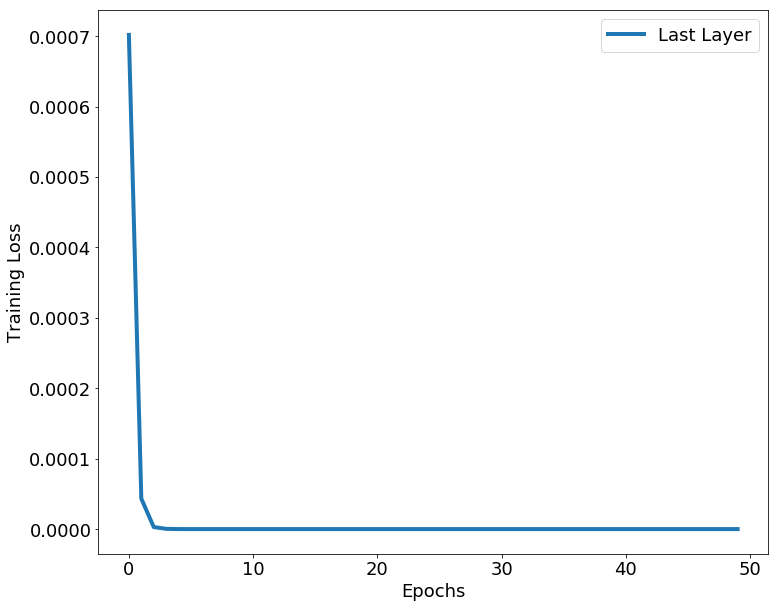

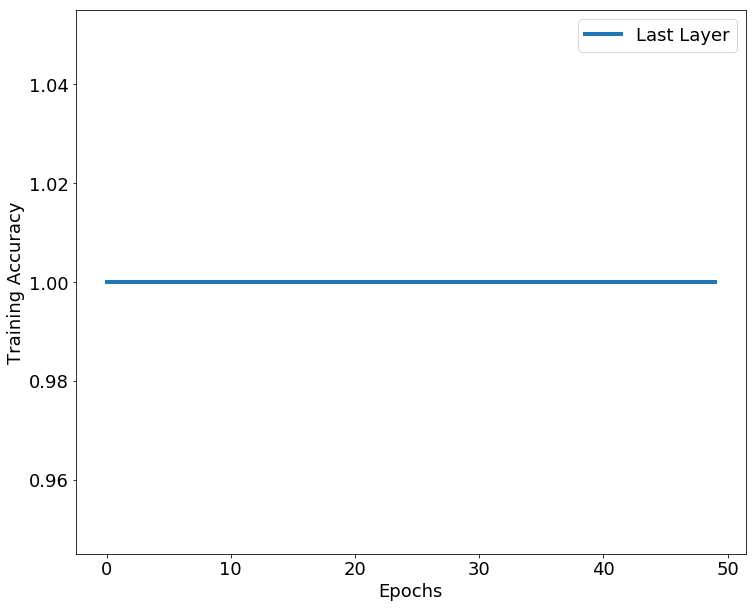

In [13]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

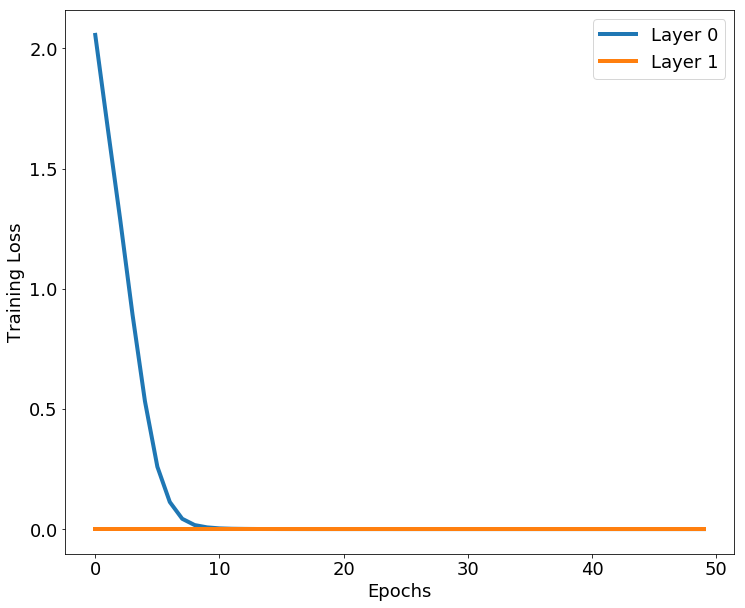

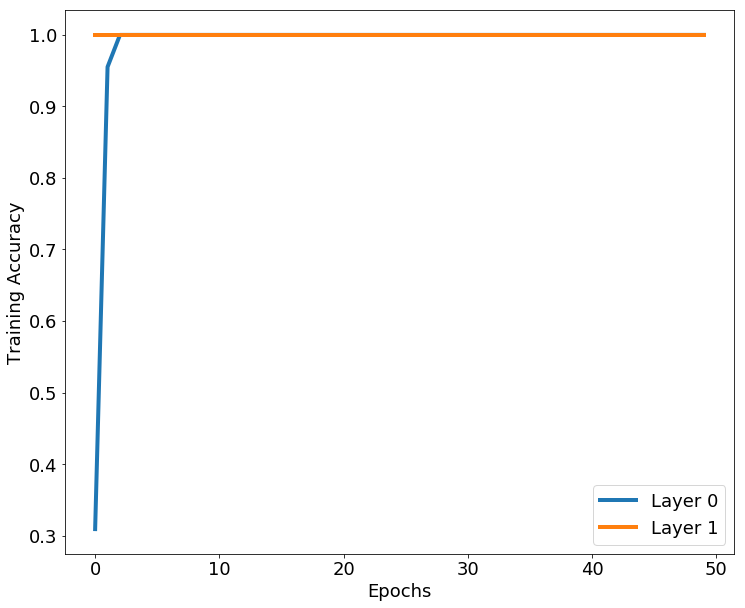

In [14]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Run test suite and visualize

In [15]:
#set network to inference mode
branchyNet.testing()
branchyNet.verbose = False
if cuda.available:
    branchyNet.to_gpu()
g_baseacc, g_basediff, _, _ = utils.test(branchyNet, x_test, y_test, main=True, batchsize=TEST_BATCHSIZE)
g_basediff = (g_basediff / float(len(y_test))) * 1000.

#branchyNet.to_cpu()
c_baseacc, c_basediff, _, _ = utils.test(branchyNet, x_test, y_test, main=True, batchsize=TEST_BATCHSIZE)
c_basediff = (c_basediff / float(len(y_test))) * 1000.

In [16]:
# Specify thresholds
thresholds = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1., 2., 3., 5., 10.]

In [17]:
#GPU
if cuda.available:
    branchyNet.to_gpu()
g_ts, g_accs, g_diffs, g_exits = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                    batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
g_diffs *= 1000.


In [18]:
import matplotlib as plt
import numpy as np

print(g_accs)
print(g_diffs)
print(g_ts)
print(g_exits)
print(g_baseacc)
print(g_basediff)

tmp = np.array(g_accs)
#print(plt.rcParams.keys())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.44484901 1.2688899  0.75106621 0.45539141 0.43111086 0.41904449
 0.38793087 0.39106131 0.40163755 0.40509939 0.39888144 0.39936543
 0.4015851  0.39397478 0.40088177 0.40287971 0.39824247]
[[0.0001], [0.0005], [0.001], [0.005], [0.01], [0.025], [0.05], [0.075], [0.1], [0.25], [0.5], [0.75], [1.0], [2.0], [3.0], [5.0], [10.0]]
[array([23, 77]), array([69, 31]), array([89, 11]), array([99,  1]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0]), array([100,   0])]
1.0
7.75675773621


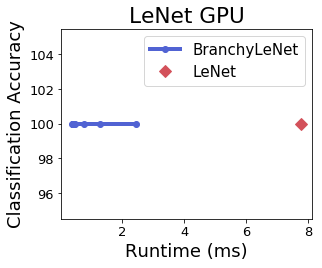

In [19]:
visualize.plot_line_tradeoff(g_accs, g_diffs, g_ts, g_exits, g_baseacc, g_basediff, all_samples=False, inc_amt=-0.0001,
                             our_label='BranchyLeNet', orig_label='LeNet', xlabel='Runtime (ms)', 
                             title='LeNet GPU', output_path='_figs/lenet_gpu.pdf')

In [20]:
#CPU
branchyNet.to_cpu()
c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                       batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
c_diffs *= 1000.

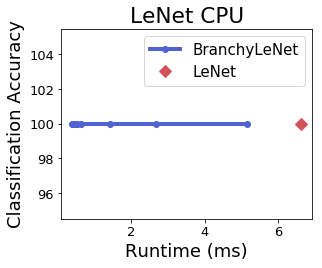

In [21]:
visualize.plot_line_tradeoff(c_accs, c_diffs, c_ts, c_exits, c_baseacc, c_basediff, all_samples=False, inc_amt=-0.0001,
                             our_label='BranchyLeNet', orig_label='LeNet', xlabel='Runtime (ms)',
                             title='LeNet CPU', output_path='_figs/lenet_cpu.pdf')

In [22]:
print 'CPU Results:'
utils.branchy_table_results('LeNet', c_baseacc, c_basediff, c_accs, c_diffs, c_exits, c_ts)

print '\n\n'

print 'GPU Results:'
utils.branchy_table_results('LeNet-MNIST', g_baseacc, g_basediff, g_accs, c_diffs, g_exits, g_ts)

CPU Results:
        Network        Acc.(%)       Time(ms)           Gain      Thrshld.T        Exit(%)
          LeNet         100.00           6.62              -              -              -
        B-LeNet         100.00           5.17           1.28       {0.0001}   {23.0, 77.0}
        B-LeNet         100.00           2.67           2.48       {0.0005}   {69.0, 31.0}
        B-LeNet         100.00           1.42           4.67        {0.001}   {89.0, 11.0}
        B-LeNet         100.00           0.61          10.82        {0.005}    {99.0, 1.0}
        B-LeNet         100.00           0.47          14.17         {0.01}   {100.0, 0.0}
        B-LeNet         100.00           0.52          12.75        {0.025}   {100.0, 0.0}
        B-LeNet         100.00           0.52          12.71         {0.05}   {100.0, 0.0}
        B-LeNet         100.00           0.40          16.42        {0.075}   {100.0, 0.0}
        B-LeNet         100.00           0.40          16.66          {0.1}  

Save model/data

In [23]:
import dill
branchyNet.to_cpu()
with open("_models/lenet_mnist.bn", "wb") as f:
    dill.dump(branchyNet, f)
with open("_models/lenet_mnist_gpu_results.pkl", "wb") as f:
    dill.dump({'accs': g_accs, 'rt': g_diffs, 'exits': g_exits, 'ts': g_ts, 'baseacc': g_baseacc, 'basediff': g_basediff}, f)
with open("_models/lenet_mnist_cpu_results.pkl", "wb") as f:
    dill.dump({'accs': c_accs, 'rt': c_diffs, 'exits': c_exits, 'ts': c_ts, 'baseacc': c_baseacc, 'basediff': c_basediff}, f)

In [24]:
import dill
with open("_models/lenet_mnist_gpu_results.pkl", "rb") as f:
    gpu_res = dill.load(f)
with open("_models/lenet_mnist_cpu_results.pkl", "rb") as f:
    cpu_res = dill.load(f)